<Body>


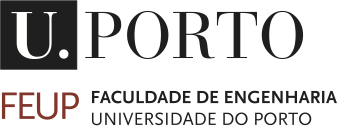   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


#Notebook 04

# Part 1 - Linear Regression with regularization

## The Generalization problem
Understanding the following challenges is crucial for machine learning practitioners:

1. How does the model perform on ('training') data which has experienced before?
2. How does a model perform on previously unseen ('testing') data?
3. How should a model be selected?

Those questions constitute the basics of **underfitting** and **overfitting**.


**Example**:

Let's produce noisy data that will be fitted later on by different models (with polynomial and Gaussian kernels).  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

rng = np.random.RandomState(1)

size_training = 50
x_limit    = 8

#Create some noisy data that will be used for trainning models
x_training = x_limit * rng.rand(size_training)
y_training = np.sin(x_training+3.1415/2) + 0.1 * rng.randn(size_training)   # sin(.)+noise

plt.scatter(x_training, y_training, marker="x")
plt.title("Training set");


1) Using models based on $\color{green}{
  \text{Polynomial Kernels}
}$ to fit this training set.

In [ ]:
# Using sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#testing set
size_testing   = 20
x_testing      = np.linspace(0, x_limit, size_testing)
y_testing      = np.sin(x_testing+3.1415/2)  + 0.1 * rng.randn(size_testing)

# continous model (for drawing)
draw_size = 500
x_draw = np.linspace(0,x_limit,draw_size)

#Overfitting Model
nb_degree_over       = 12
model_overfitting    = make_pipeline(PolynomialFeatures(nb_degree_over), LinearRegression())
model_overfitting.fit(x_training[:, np.newaxis], y_training)
print("Training MSE (Poly Model Overfitting):", mean_squared_error(y_training, model_overfitting.predict(x_training[:, np.newaxis])))

y_overfitting        = model_overfitting.predict(x_testing[:, np.newaxis])
m_error_overfitting  = mean_squared_error(y_testing, y_overfitting)
print("Testing MSE (Poly Model Overfitting):", m_error_overfitting)

y_over_draw = model_overfitting.predict(x_draw[:, np.newaxis])

#Underfitting Model
nb_degree_under       = 3
model_underfitting    = make_pipeline(PolynomialFeatures(nb_degree_under), LinearRegression())
model_underfitting.fit(x_training[:, np.newaxis], y_training)
print("Training MSE (Poly Model Underfitting):", mean_squared_error(y_training, model_underfitting.predict(x_training[:, np.newaxis])))

y_underfitting        = model_underfitting.predict(x_testing[:, np.newaxis])
m_error_underfitting  = mean_squared_error(y_testing, y_underfitting)
print("Testing MSE (Poly Model Underfitting):", m_error_underfitting)

y_under_draw = model_underfitting.predict(x_draw[:, np.newaxis])

#Plots
legend_fitting_model_overfitting = 'Overf model: d{}'.format(nb_degree_over)
legend_fitting_model_underfitting = 'Underf model: d{}'.format(nb_degree_under)
plt.scatter(x_training, y_training,  color="gray", marker="x", label='Training data')
plt.scatter(x_testing, y_testing,  color="blue", marker="o", label='Testing data')
plt.plot(x_draw, y_under_draw, color="g", label=legend_fitting_model_underfitting, linewidth=1.5)
plt.plot(x_draw, y_over_draw, color="r", label=legend_fitting_model_overfitting, linewidth=1.5)
plt.legend(loc ="best")
plt.title("Under vs Over fitting: polynomial kernel")
plt.show()


2) Using models based on $\color{green}{
  \text{Gaussian Kernels}
}$ to fit this training set.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
"""
  Gaussian models
  -> Uniformly spaced
  -> One-dimension input
"""
class GaussianBases(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_kernel = 3.0):
        self.N = N
        self.width_kernel = width_kernel

    @staticmethod
    def _gauss_basis(x, y, width = 3.0, sigma_f=1, axis=None):
        arg = (x - y) / width
        return sigma_f*np.exp(-0.5 * np.sum(arg ** 2, axis))/(2 * width**2)  ## Gaussian Kernel

    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_kernel * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

#Overfitting Model
n_models_gauss_over    = 20
gauss_model_overfitting = make_pipeline(GaussianBases(n_models_gauss_over), LinearRegression())
gauss_model_overfitting.fit(x_training[:, np.newaxis], y_training)
print("Training MSE (Gauss Model Overfitting):", mean_squared_error(y_training, gauss_model_overfitting.predict(x_training[:, np.newaxis])))

yfit_overfitting        = gauss_model_overfitting.predict(x_testing[:, np.newaxis])
m_error_overfitting     = mean_squared_error(y_testing, yfit_overfitting)
print("Testing MSE (Gauss Model Overfitting):", m_error_overfitting)

ydraw_over = gauss_model_overfitting.predict(x_draw[:, np.newaxis])

#Underfitting Model
n_models_gauss_under     = 2
gauss_model_underfitting = make_pipeline(GaussianBases(3), LinearRegression())
gauss_model_underfitting.fit(x_training[:, np.newaxis], y_training)
print("Training MSE (Gauss Model Underfitting):", mean_squared_error(y_training, gauss_model_underfitting.predict(x_training[:, np.newaxis])))

yfit_underfitting        = gauss_model_underfitting.predict(x_testing[:, np.newaxis])
m_error_underfitting     = mean_squared_error(y_testing, yfit_underfitting)
print("Testing MSE (Gauss Model Underfitting):", m_error_underfitting)

ydraw_under = gauss_model_underfitting.predict(x_draw[:, np.newaxis])

#Plots
legend_fitting_model_overfitting = 'Overf model: n{}'.format(n_models_gauss_over)
legend_fitting_model_underfitting = 'Underf model: n{}'.format(n_models_gauss_under)
plt.scatter(x_training, y_training,  color="gray", marker="x", label='Training data')
plt.scatter(x_testing, y_testing,  color="blue", marker="o", label='Testing data')
plt.plot(x_draw, ydraw_under, color="g", label=legend_fitting_model_underfitting, linewidth=1.5)
plt.plot(x_draw, ydraw_over, color="r", label=legend_fitting_model_overfitting, linewidth=1.5)
plt.legend(loc ="best")
plt.title("Under vs Over fitting: Gaussian kernel")
plt.show()


$\color{orange}{\text{Underfitting}}$ means that the model is too simple and there is still progress to be made because the training error (considering a loss function) is high well after training the model with several examples.

$\color{red}{\text{Overfitting}}$ means that the model is fitting the training data more closely than the underlying phenomenon that is being captured and, therefore, there is a large difference between training (small) and testing error (high). It usually appears when the model fits the training data much better than new test examples - lack of generalization capacity.


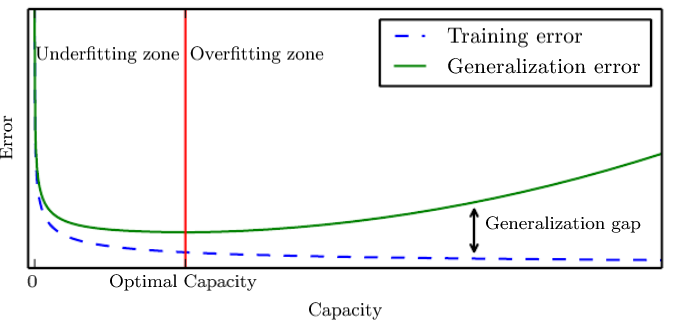

source: (Goodfellow et al., 2016)

A model that is highly flexible will learn spurious (or irrelevant) patterns as easily as the true associations. Thus, the model will be unable to generalizes well for unseen data. The best option to prevent a model from learning misleading patterns is to get more training data (which can be problematic for some cases). There are techniques that can be used to combat overfittiting - a high model complexity.




## Regularization

A $\color{green}{\text{Regularization}}$ technique aims to reduce overfitting by penalizing the **model complexity**.
Recalling that the linear regression minimizes the following loss function:
\begin{equation}
J (\mathbf{\theta}) = \sum_{n=1}^N (y_n - \mathbf{\theta}^T\mathbf{x}_n)^2
\end{equation}

The searching space of $\mathbf{\theta}$ can be restricted by controlling $\|\mathbf{\theta}\|^2$ or  $\|\mathbf{\theta}\|_1$.



### Ridge regression ($\ell_2$ Regularization)

The *Ridge regression* is a $\ell_2$ *regularization* that penalizes the sum of squares ($\ell_2$-norms) of the model coefficients:

\begin{equation}
J_\lambda (\mathbf{\theta}) = \sum_{n=1}^N (y_n - \mathbf{\theta}^T\mathbf{x}_n)^2  + \color{red}{\lambda \|\mathbf{\theta}\|^2}
\end{equation}

where $\lambda\ge 0$ is a free parameter that quantifies a penalty for the norm of the parameter vector. Ridge regression tries to keep the sum of squared errors small and, at the same time, it attempts to reduce the norm of the estimated vector.
This type of penalized model is built into sklearn with the ``Ridge`` estimator:

In [ ]:
from sklearn.linear_model import Ridge

#Ridge Model
gauss_model_ridge = make_pipeline(GaussianBases(n_models_gauss_over), Ridge(alpha=0.1))
gauss_model_ridge.fit(x_training[:, np.newaxis], y_training)
print("Training MSE (Ridge Model):", mean_squared_error(y_training, gauss_model_ridge.predict(x_training[:, np.newaxis])))
print("Testing MSE (Ridge Model):", mean_squared_error(y_testing, gauss_model_ridge.predict(x_testing[:, np.newaxis])))

ydraw_ridge = gauss_model_ridge.predict(x_draw[:, np.newaxis])


#Plots
legend_fitting_model_ridge = 'Ridge model: n{}'.format(n_models_gauss_over)
plt.scatter(x_training, y_training,  color="gray", marker="x", label='Training data')
plt.scatter(x_testing, y_testing,  color="blue", marker="o", label='Testing data')
plt.plot(x_draw, ydraw_under, color="g", label=legend_fitting_model_underfitting, linewidth=1.5)
plt.plot(x_draw, ydraw_over, color="r", label=legend_fitting_model_overfitting, linewidth=1.5)
plt.plot(x_draw, ydraw_ridge, color="y", label=legend_fitting_model_ridge, linewidth=3.5)
plt.legend(loc ="best")
plt.title("Ridge Regression: Gaussian kernel")
plt.show()

### LASSO regression ($\ell_1$ regularization)

The LASSO regularization involves penalizing the sum of absolute values ($\ell_1$-norm) of regression coefficients:

\begin{equation}
J_\lambda (\mathbf{\theta}) = \sum_{n=1}^N (y_n - \mathbf{\theta}^T\mathbf{x}_n)^2  + \color{red}{\lambda \|\mathbf{\theta}\|_1}
\end{equation}

where $\|\cdot\|_1$ is the $\ell_1$-norm (that is, $\|\theta\|_1=\sum_{i=1}^d|\theta_i|$) and $\lambda\ge 0$ is a hyperparameter that tunes the strength of the penalty, and should be determined via, for example, cross-validation. Lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero. This type of penalized model is built into sklearn with the ``Lasso`` estimator:

In [ ]:
from sklearn.linear_model import Lasso

#Lasso Model
gauss_model_lasso = make_pipeline(GaussianBases(n_models_gauss_over), Lasso(alpha=0.001))
gauss_model_lasso.fit(x_training[:, np.newaxis], y_training)
print("Training MSE (LASSO Model):", mean_squared_error(y_training, gauss_model_lasso.predict(x_training[:, np.newaxis])))
print("Testing MSE (LASSO Model):", mean_squared_error(y_testing, gauss_model_lasso.predict(x_testing[:, np.newaxis])))

ydraw_lasso = gauss_model_lasso.predict(x_draw[:, np.newaxis])

#Plots
legend_fitting_model_lasso = 'Lasso model: n{}'.format(n_models_gauss_over)
plt.scatter(x_training, y_training,  color="gray", marker="x", label='Training data')
plt.scatter(x_testing, y_testing,  color="blue", marker="o", label='Testing data')
plt.plot(x_draw, ydraw_under, color="g", label=legend_fitting_model_underfitting, linewidth=1.5)
plt.plot(x_draw, ydraw_over, color="r", label=legend_fitting_model_overfitting, linewidth=1.5)
plt.plot(x_draw, ydraw_ridge, color="y", label=legend_fitting_model_ridge, linewidth=3.5)
plt.plot(x_draw, ydraw_lasso, color="m", label=legend_fitting_model_lasso, linewidth=3.5)
plt.legend(loc ="best")
plt.title("LASSO Regression: Gaussian kernel")
plt.show()


The estimated vector $\mathbf{\theta}$ for the Linear Regression, Ridge and Lasso models can be seen below. The majority of the coefficients are exactly zero with the LASSO regression penalty.



In [ ]:
print("Model (Overfit):\n", gauss_model_overfitting.named_steps['linearregression'].coef_)
print("Ridge Model:\n", gauss_model_ridge.named_steps['ridge'].coef_)
print("LASSO Model:\n", gauss_model_lasso.named_steps['lasso'].coef_)

## **Activity 1.1**
In the example above test several penalties for the Ridge and LASSO regresssions and compare the mean square errors of training and testing sets.

For Ridge test with λ=0.01, λ=0.1, λ=1 and λ=10.

For Lasso test with λ=0.0001, λ=0.001, λ=0.01 and λ=0.1.

In [ ]:
# code for activity 1.1

------------------------------

## **Activity 1.2**
Use the classic [Auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg) to build models for predicting the fuel efficiency of cars from the late-1970s and early 1980s.
Before starting, it is crucial to preprocess the data because contains missing information, presence of categorical values, and features at different scales. Please analyse and execute the following code that preprocesses data accordingly.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Download dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

# Drop NaN values
dataset = dataset.dropna()

# One-hot encoding for "Origin" column, which is categorical and not numeric.
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset
#dataset.tail()



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


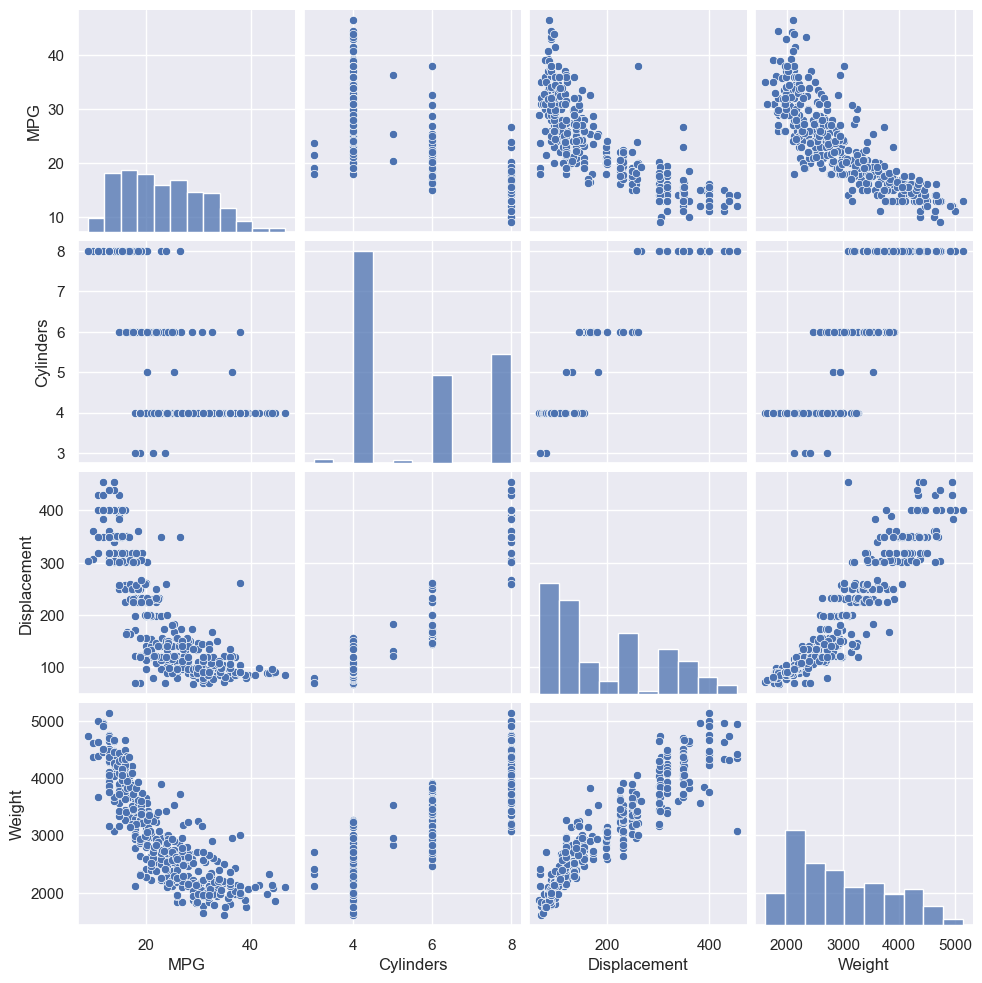

In [24]:
# Uncomment to Inspect Training Data
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']])
dataset.describe().transpose()


**1.2.1.** Normalize the dataset based on the minimum and maximum value of each feature ("Displacement", "Horsepower", "Weight", "Acceleration") and label ("MPG").
Divide the original dataset into the training set (70%) and a testing set (30%).


In [28]:
#1.2.1 to complete

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

All_Data  = dataset.to_numpy()

# Normalize features. see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler() # Create a scaler based on min and max values of the data
All_Data_normalized = scaler.fit_transform(All_Data) # Normalize the data based on the min and max values

#Create X matrix and Y vector
Y   = All_Data_normalized[:, 0:1] #Label: "MPG"
X   = All_Data_normalized[:, 2:6] #Selecting only the features "Displacement, Horsepower, Weight, Acceleration"
feature_custom = np.add(X[:, 1], X[:, 3]).reshape(-1, 1)  # Add feature: HorsePower + Acceleration
X = np.concatenate((X, feature_custom), axis = 1 )
# Feature vector: "Displacement", "Horsepower", "Weight", "Acceleration", "HorsePower + Acceleration"

# Split data into train (70%) and test (30%) set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_test)
print(y_test)

[[0.072 0.125 0.163 0.595 0.72 ]
 [0.137 0.375 0.335 0.458 0.833]
 [0.059 0.076 0.053 0.5   0.576]
 [0.059 0.13  0.097 0.744 0.874]
 [0.186 0.217 0.334 0.452 0.67 ]
 [0.075 0.158 0.154 0.5   0.658]
 [0.858 0.674 0.888 0.238 0.912]
 [0.075 0.158 0.185 0.607 0.765]
 [0.406 0.266 0.468 0.476 0.742]
 [0.    0.016 0.072 0.685 0.701]
 [0.832 0.783 0.634 0.03  0.812]
 [0.227 0.337 0.373 0.446 0.783]
 [0.729 0.592 0.779 0.411 1.003]
 [0.075 0.158 0.158 0.476 0.634]
 [0.245 0.473 0.509 0.464 0.937]
 [0.114 0.228 0.281 0.69  0.919]
 [0.336 0.266 0.422 0.506 0.772]
 [0.103 0.158 0.209 0.524 0.681]
 [0.137 0.185 0.3   0.417 0.601]
 [0.14  0.228 0.251 0.423 0.651]
 [0.336 0.266 0.346 0.446 0.713]
 [0.075 0.033 0.147 0.988 1.021]
 [0.059 0.12  0.105 0.476 0.596]
 [0.618 0.457 0.536 0.238 0.695]
 [0.028 0.114 0.099 0.446 0.561]
 [0.078 0.239 0.185 0.446 0.686]
 [0.134 0.223 0.387 0.685 0.907]
 [0.406 0.321 0.518 0.446 0.767]
 [0.075 0.    0.096 0.774 0.774]
 [0.137 0.163 0.255 0.595 0.758]
 [0.729 0.


**1.2.2.**  Determine a solution for the regression model :
$$
y = a_0 + a_1 x_1 + a_2 x_2  + a_3 x_3  + a_4 x_4 + a_5 x_5
$$
where $x_1$, $x_2$, $x_3$, $x_4$ and $x_5$  is the displacement, horsepower, weight, acceleration and horsepower+acceleration of a car, respectively. The solution that was obtained is unique?



In [31]:
# 1.2.2 to complete

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, y_train) # Train the model based on the normalized data
yfit = model.predict(X_test) # Test the linear regression

# The mean squared error
print("Training MSE (Linear Model): %.2f" % mean_squared_error(y_train, model.predict(X_train)))
print("Testing MSE (Linear Model): %.2f" % mean_squared_error(y_test, yfit))

# Show model
print("Model: ", model.intercept_, model.coef_)

#Singular values
print("Model Singular values:", model.singular_)

Training MSE (Linear Model): 0.01
Testing MSE (Linear Model): 0.01
Model:  [0.694] [[-1.025e-01  5.321e+12 -4.453e-01  5.321e+12 -5.321e+12]]
Model Singular values: [7.    2.999 1.425 0.995 0.   ]


**1.2.3.**  Implement a Ridge Regressor ($X^\top X + \lambda I$) and determine a solution for the previous problem. Explain whether $X^\top X + \lambda I$ is invertible.

In [1]:
# 1.2.3 to complete

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#Ridge Model
model_ridge = Ridge(alpha = 0.1)
model_ridge.fit(X_train, y_train)
yfit_ridge  = model_ridge.predict(X_test)

# The mean squared error
print("Training MSE (Ridge Model): %.2f" % mean_squared_error(y_train, model_ridge.predict(X_train)))
print("Testing MSE (Ridge Model): %.2f" % mean_squared_error(y_test, yfit_ridge))

# Show model
print("Model: ", model_ridge.intercept_, model_ridge.coef_)

NameError: name 'X_train' is not defined

**1.2.4**
Repeat the previous exercise, but using LASSO regularization.

In [35]:
# 1.2.4 to complete ...

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#Lasso Model
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(X_train, y_train)
yfit_lasso = model_lasso.predict(X_test)

#Print
print("Training MSE (Lasso Model): %.2f" % mean_squared_error(y_train, model_lasso.predict(X_train)))
print("Testing MSE (Lasso Model): %.2f" % mean_squared_error(y_test, yfit_lasso))

#Show model
print("Model: ", model_lasso.intercept_, model_lasso.coef_)

Training MSE (Lasso Model): 0.01
Testing MSE (Lasso Model): 0.01
Model:  [0.59] [-0.285 -0.    -0.272  0.    -0.   ]


_______________________________________

## **Activity 1.3**

Derive the least squares optimal solution with ridge regularization for the model
$$
f_\theta(x) = \theta^\top\phi(x)
$$
where $\theta = [\theta_0, \theta_1]^\top$, $\phi(x)= [\phi_0(x), \phi_1(x)]^\top$, and $x\in\mathbb{R}^d$. In other words, apply the (necessary) optimality condition to
$$
\min_{\theta} \Big(\sum_{n=1}^N \big(y_n - \theta^\top\phi(x_n)\big)^2+\lambda \|\theta\|^2\Big)
$$

# Part 2 - Estimation

Given $N$ observations, $\mathcal{X}= \{x_1,x_2,...,x_N\}$, drawn from a probability distribution. Assume that the joint pdf of these $N$ observations is of a known parametric functional type, denoted as $p(\mathcal{X} ; \theta)$, where the parameter $\theta\in\mathbb{R}^K$ is unknown. The task is to estimate its value.

## Maximum Likelihood Estimation

The joint pdf, $p(\mathcal{X} ; \theta)$, is known as the **likelihood function** of $\theta$ with respect to the given set of observations, $\mathcal{X}. According to the maximum likelihood method, the estimate is provided by

$$ \hat{\theta}_{\mathrm{ML}} = \mathrm{arg} \max_\theta p(\mathcal{X} ; \theta).$$

Since the logarithmic function is monotone and increasing, one can instead search for the maximum of the **log-likelihood function**, that is,

$$ \left.\frac{\partial \ln p(\mathcal{X} ; \theta)}{\partial \theta}\right|_{\theta = \hat{\theta}_{\mathrm{ML}}} = 0.$$

### **Activity 2.1**

The exponential distribution with parameter $\lambda>0$ is characterized by the probability function
$$p(x;\lambda) = \lambda e^{-\lambda x},\quad x\geq 0.$$
Obtain the maximum likelihood estimate of $\lambda$ based on observations $\left\{ x_i\right\}_{i=1}^N$ of this distribution.

## Maximum A-Posteriori Probability Estimation

The Maximum A-Posteriori Probability estimation technique, usually denoted as MAP, is based on the Bayesian theorem, but it does not go as far as the Bayesian philosophy allows to. The goal becomes that of obtaining an estimate by maximizing

$$ \hat{\theta}_{\mathrm{MAP}} = \mathrm{arg}\max_\theta{p(\theta|\mathcal{X})} = \mathrm{arg}\max_\theta \frac{p(\mathcal{X}|\theta)p(\theta)}{p(\mathcal{X})}.$$

Since $p(\mathcal{X})$ is independent of $\theta$, this leads to

$$ \hat{\theta}_{\mathrm{MAP}} = \mathrm{arg}\max_\theta p(\mathcal{X}|\theta)p(\theta) = \mathrm{arg}\max_\theta \{\ln{ p(\mathcal{X}|\theta)} + \ln{p(\theta)}\}.$$



### **Activitiy 2.2**

Assume that $\{x_1,x_2,\ldots,x_N\}$ are i.i.d. observations from a Gaussian distribution $\mathcal{N}(\mu,\sigma^2)$. Obtain the MAP estimate of $\mu$ if the prior follows the exponential distribution
$$ p(\mu) = \lambda e^{-\lambda\mu}, \lambda > 0, \mu\geq 0.$$